# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Profissao.csv')
df = df.drop('Unnamed: 0', axis= 1)
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


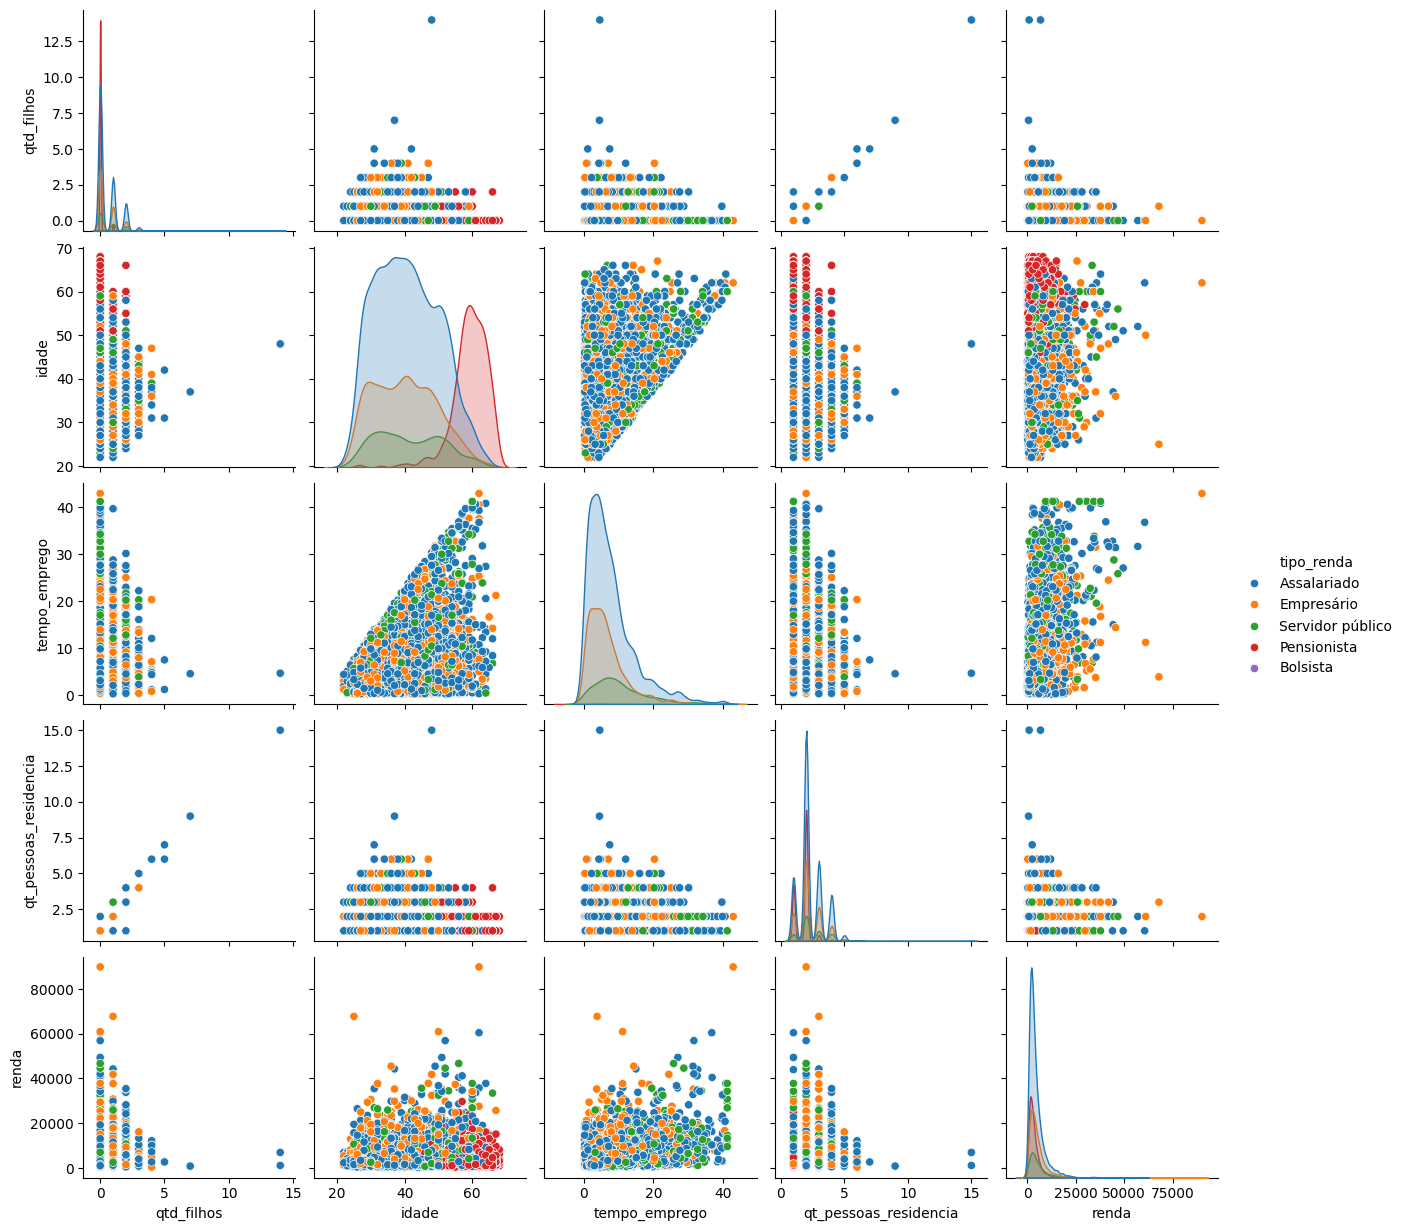

In [3]:
sns.pairplot(df, hue= 'tipo_renda', vars= ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda'])

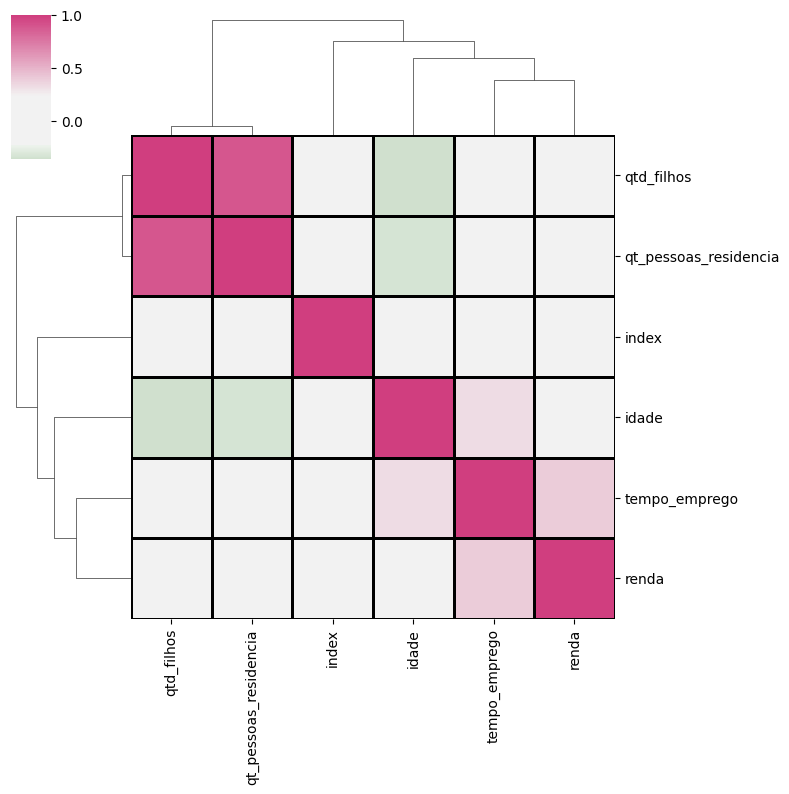

In [4]:
corr_matrix = df.select_dtypes(include=['number']).corr()

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap(corr_matrix, figsize=(8, 8), center=0, cmap=cmap, linewidths=1, linecolor='black')
plt.show()

A renda nao tem uma correlacao forte com a quantidade de filhos, idade e quantidade de pessoas por residencia.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='renda', ylabel='tempo_emprego'>

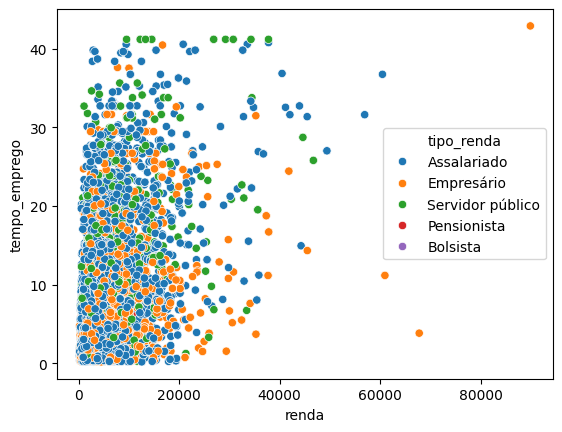

In [5]:
sns.scatterplot(data=df, x='renda', y='tempo_emprego', hue='tipo_renda')

<Axes: xlabel='renda', ylabel='idade'>

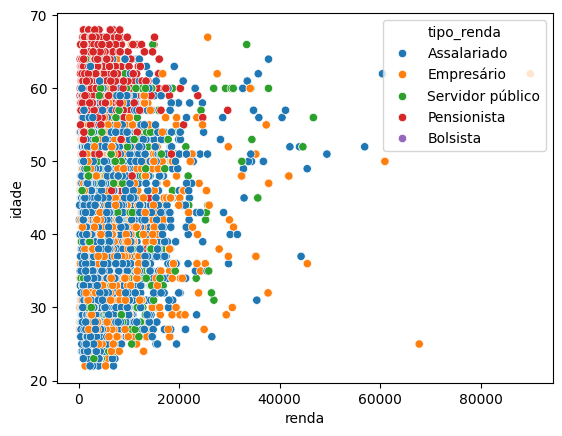

In [6]:
sns.scatterplot(data=df, x='renda', y='idade', hue= 'tipo_renda')

3) Na su aopinião, há outliers na variável renda?

Apos analizar os dados e graficos na questao anterior, podemos dizer que sim, existem outliers na variavel renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<Axes: xlabel='idade', ylabel='log_renda'>

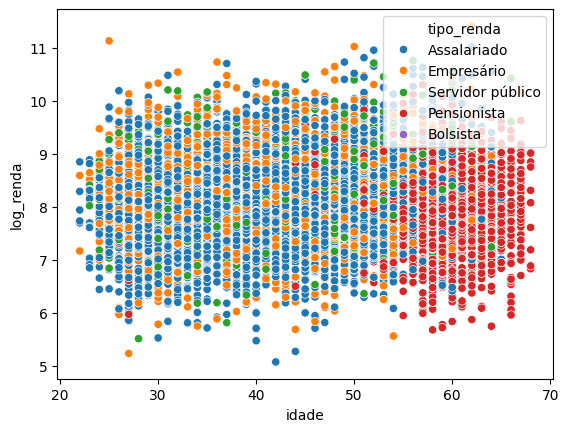

In [60]:
df_log = df.copy()
df_log['log_renda'] = np.log(df_log['renda'])

sns.scatterplot(df_log, x='idade', y='log_renda', hue='tipo_renda')

<Axes: xlabel='log_renda', ylabel='tempo_emprego'>

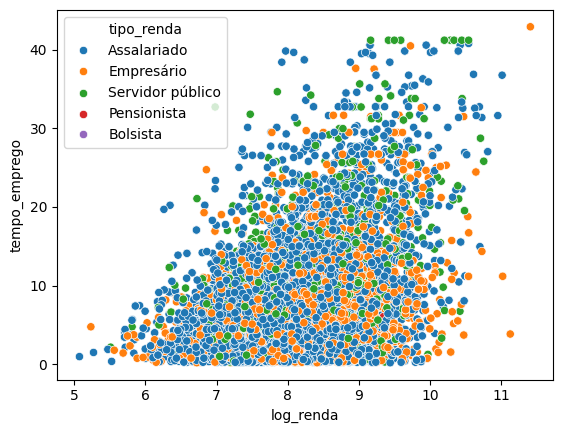

In [62]:
sns.scatterplot(df_log, x= 'log_renda', y= 'tempo_emprego', hue='tipo_renda')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicaçao do LOG surtiu um efeito positivo, permitiu vizualizar mais clara a distrubuiçao da renda.